In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('data/pima-indians-diabetes.data.txt', header=None)
df.columns = ["pregnancy_count", 
              "plasma_glucose_concentration", 
              "diastolic_blood_pressure", 
              "triceps_skin_fold_thickness", 
              "2-hour_serum_insulin",
              "body_mass_index", 
              "diabetes_pedigree_function", 
              "age", 
              "diabetes_result"]

df.head()

,pregnancy_count,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,2-hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,diabetes_result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
# import loadtxt 
from numpy import loadtxt
dataset = loadtxt("Data/pima-indians-diabetes.data.txt",  delimiter="," )
X = dataset[:,0:8]
y = dataset[:, 8]

print(len(X))
print(len(y))

768
768


In [40]:
#apply train_test_split on X, y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [41]:
#Define Keras Sequential model

from keras.models import Sequential
from keras.layers import Dense


model = Sequential([
    Dense(12, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit Keras model on dataset
model.fit(X_train, y_train, epochs=150, batch_size=10, shuffle=True, validation_split=0.1)

Epoch 1/150
49/49 [==============================] - 1s 4ms/step - loss: 5.2721 - accuracy: 0.3582 - val_loss: 2.6504 - val_accuracy: 0.3148
Epoch 2/150
49/49 [==============================] - 0s 2ms/step - loss: 1.5705 - accuracy: 0.4286 - val_loss: 0.8119 - val_accuracy: 0.5370
Epoch 3/150
49/49 [==============================] - 0s 2ms/step - loss: 0.9130 - accuracy: 0.6087 - val_loss: 0.7243 - val_accuracy: 0.6111
Epoch 4/150
49/49 [==============================] - 0s 2ms/step - loss: 0.8309 - accuracy: 0.6377 - val_loss: 0.6723 - val_accuracy: 0.6852
Epoch 5/150
49/49 [==============================] - 0s 3ms/step - loss: 0.7907 - accuracy: 0.6232 - val_loss: 0.6565 - val_accuracy: 0.6667
Epoch 6/150
49/49 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.6335 - val_loss: 0.6617 - val_accuracy: 0.7593
Epoch 7/150
49/49 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.6687 - val_loss: 0.6572 - val_accuracy: 0.7037
Epoch 8/150
4

In [42]:
# evaluate Keras model

_, accuracy = model.evaluate(X, y)

print("Accuracy: %.2f" % (accuracy*100))



24/24 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.7031
Accuracy: 70.31


In [43]:
# Alternatively you can directly convert the model predict >0.5 to 1 and 0
y_pred = (model.predict(X_test) > 0.5).astype(int)

8/8 [==============================] - 0s 1ms/step


In [47]:
# print confusion matrix and various metrics
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix, compute_metrics
cm = confusion_matrix(y_test, y_pred)
compute_metrics(cm)
 

Accuracy: 0.6493506493506493
Sensitivity: 0.7021276595744681
Specificity: 0.4186046511627907
Precision: 0.8407643312101911
Recall: 0.7021276595744681
F1 Score: 0.7652173913043478


(0.6493506493506493,
 0.7021276595744681,
 0.4186046511627907,
 0.8407643312101911,
 0.7021276595744681,
 0.7652173913043478)

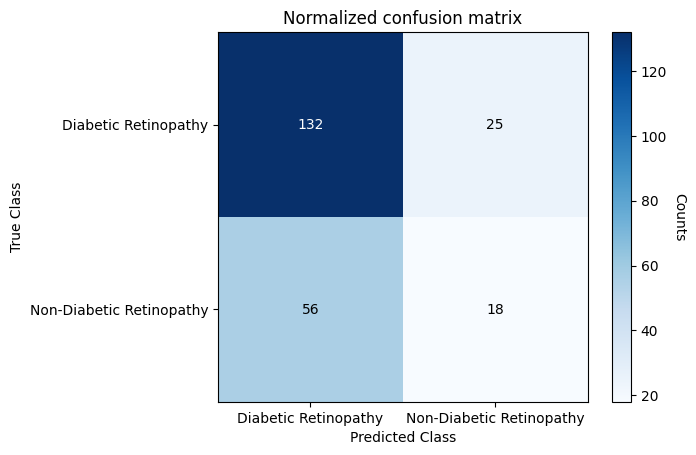

In [51]:
from utils import plot_confusion_matrix
plot_confusion_matrix(cm, classes=["Diabetic Retinopathy", "Non-Diabetic Retinopathy"], title='Normalized confusion matrix')
